In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from keras.applications.vgg16 import VGG16

warnings.filterwarnings('ignore')
num_classes = 10
epochs = 20

df_train = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
df_test = pd.read_csv('./input/fashion-mnist_test.csv', sep = ',')


# przygotowanie danych
train_labels = df_train['label'].values
test_labels = df_test['label'].values
train_images = df_train.drop(['label'], axis=1).values / 255.0
test_images = df_test.drop(['label'], axis=1).values / 255.0

# zmiana wymiarów obrazów na 28x28x1
train_images = np.reshape(train_images, (-1, 28, 28, 1))
test_images = np.reshape(test_images, (-1, 28, 28, 1))

# zmiana rozmiaru obrazów na 224x224
train_images = tf.image.resize(train_images, [224, 224])
test_images = tf.image.resize(test_images, [224, 224])

# wczytanie wstępnie wytrenowanego modelu VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# zamrożenie warstw wstępnie wytrenowanego modelu
for layer in vgg.layers:
    layer.trainable = False

# dodanie nowych warstw
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# utworzenie nowego modelu z wstępnie wytrenowanym modelem VGG16 i nowymi warstwami
model = Model(inputs=vgg.input, outputs=output)

# kompilacja modelu
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# trenowanie nowego modelu tylko dla nowych warstw
model.fit(train_images, train_labels, epochs=10)

# predykcja na zbiorze testowym
predictions = model.predict(test_images)





Metal device set to: Apple M1


2023-03-07 09:14:22.350536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 09:14:22.350685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-03-07 09:14:36.446615: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model" "                 f"(type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 224, 224, 1)
    
    Call arguments received by layer "model" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(32, 224, 224, 1), dtype=float32)
      • training=True
      • mask=None


In [32]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.datasets import fashion_mnist

# wczytanie danych Zalando fashion mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# przygotowanie danych
train_images = train_images / 255.0
test_images = test_images / 255.0

# wczytanie wstępnie wytrenowanego modelu VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# zamrożenie warstw wstępnie wytrenowanego modelu
for layer in vgg.layers:
    layer.trainable = False

# dodanie nowych warstw
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# utworzenie nowego modelu z wstępnie wytrenowanym modelem VGG16 i nowymi warstwami
model = Model(inputs=vgg.input, outputs=output)

# kompilacja modelu
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# trenowanie nowego modelu tylko dla nowych warstw
model.fit(train_images.reshape(-1, 32, 32, 1), train_labels, epochs=10, validation_data=(test_images.reshape(-1, 32, 32, 1), test_labels))


ValueError: cannot reshape array of size 47040000 into shape (32,32,1)

In [22]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.applications.vgg16 import VGG16

vgg = VGG16(weights='imagenet', include_top=False, input_shape=(28, 28, 1))
# zamrożenie warstw wstępnie wytrenowanego modelu
for layer in vgg.layers:
    layer.trainable = False

# dodanie nowych warstw
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# utworzenie nowego modelu z wstępnie wytrenowanym modelem VGG16 i nowymi warstwami
model = Model(inputs=vgg.input, outputs=output)


params = [
    {   'model': vgg
        , 'adam_lr': 0.0025
        , 'batch_size': 64
        , 'epochs': 10},
    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         Dropout(0.2),
    #         MaxPooling2D(pool_size=2),
    #         Dropout(0.2), Flatten(),
    #         Dense(16, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 128
    #     , 'epochs': 30},


    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         Dropout(0.2),
    #         MaxPooling2D(pool_size=2),
    #         Dropout(0.2), Flatten(),
    #         Dense(32, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         MaxPooling2D(pool_size=2), Dropout(0.2), Flatten(),
    #         Dense(32, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {     'filters': 32
    #     , 'kernel_size': 4
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},
    #
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 2048
    #     , 'epochs': 30},

    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 4096
    #     , 'epochs': 30},

    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.002
    #     , 'batch_size': 4096
    #     , 'epochs': 30},
    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 24
    #     , 'adam_lr': 0.001
    #     , 'batch_size': 4096
    #     , 'epochs': 35},
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.001
    #     , 'batch_size': 4096
    #     , 'epochs': 35},
]

for p in params:
    print('>>> Params: ', p)
    cnn_model = p['model']
    cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=p['adam_lr']), metrics =['accuracy'])
    history = cnn_model.fit(
        x_train,
        y_train,
        batch_size=p['batch_size'],
        epochs=p['epochs'],
        verbose=0,
        validation_data=(x_validate, y_validate),
    )
    score = cnn_model.evaluate(x_test, y_test, verbose=0)
    print('===========================')
    print('>>>> Test Loss : {:.4f}'.format(score[0]))
    print('>>>> Test Accuracy : {:.4f}'.format(score[1]))
    print('===========================\n\n')
    cnn_model.reset_states()
    del cnn_model

ValueError: The input must have 3 channels; Received `input_shape=(28, 28, 1)`

>>> Params:  {'model': <keras.engine.sequential.Sequential object at 0x28220d780>, 'adam_lr': 0.0025, 'batch_size': 64, 'epochs': 100}


2023-02-22 17:11:06.112921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-22 17:11:12.567680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-22 17:23:30.917865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


>>>> Test Loss : 0.2930
>>>> Test Accuracy : 0.9033


 24/313 [=>............................] - ETA: 1s

2023-02-22 17:23:33.306268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.87      0.81      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.87      0.82      0.85      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.89      0.84      0.87      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.67      0.81      0.73      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



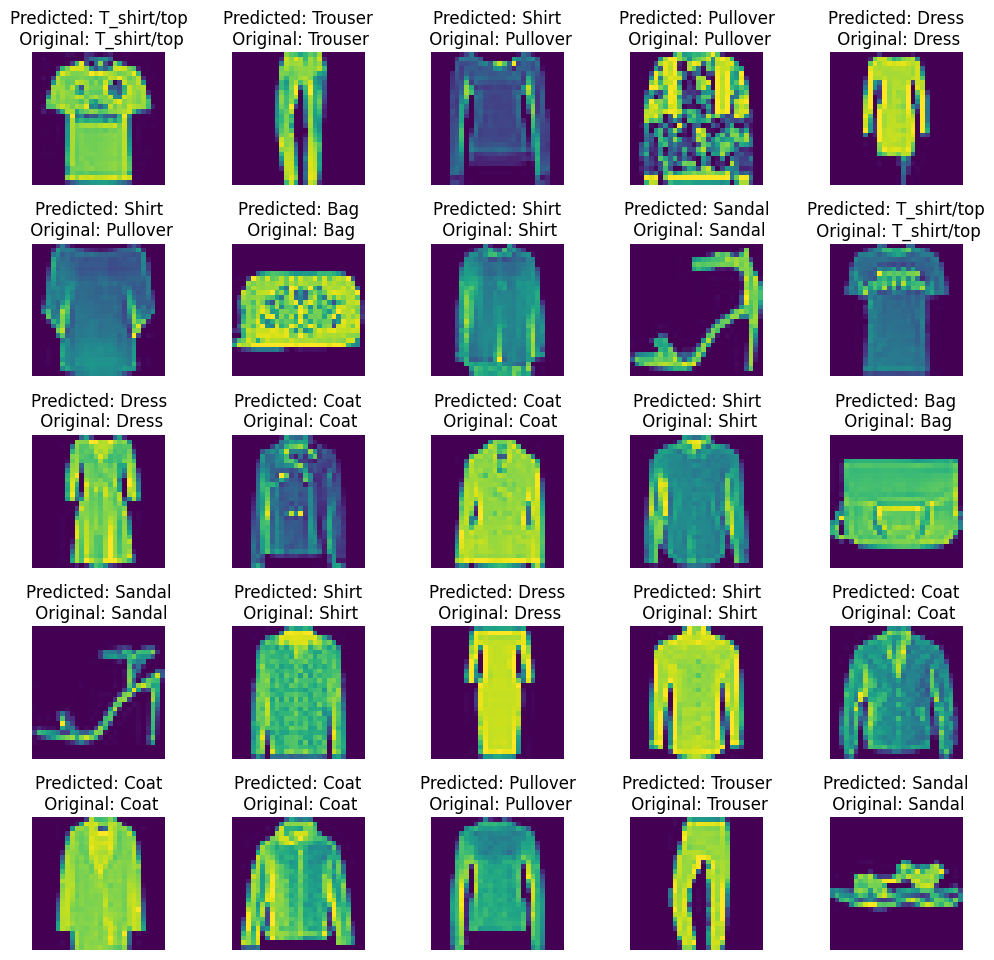

In [27]:
params = [
    # # -0.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0005
    #     , 'batch_size': 4096
    #     , 'epochs': 75},
    # + 0.12

    {   'model': Sequential([
        Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
        Dropout(0.2),
        MaxPooling2D(pool_size=2),
        Dropout(0.2), Flatten(),
        Dense(16, activation='relu'),
        Dense(10, activation = 'softmax')])
        , 'adam_lr': 0.0025
        , 'batch_size': 64
        , 'epochs': 100},
]
p = params[0]

print('>>> Params: ', p)
cnn_model = p['model']
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=p['adam_lr']), metrics =['accuracy'])
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=p['batch_size'],
    epochs=p['epochs'],
    verbose=0,
    validation_data=(x_validate, y_validate),
)
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('===========================')
print('>>>> Test Loss : {:.4f}'.format(score[0]))
print('>>>> Test Accuracy : {:.4f}'.format(score[1]))
print('===========================\n\n')

predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)
y_test = test_df.iloc[:, 0]
print(classification_report(y_test, predicted_classes, target_names=class_names))

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    # axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}\n Original: {class_names[y_test[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)